# Aluminum solve using Tableau OR PHREEQC method

use the same constants as used in PHREEQC method

In [2]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%delete existing phreeqc files
system("rm DATABASE.dat");
system("rm runfile.txt");
%create empty phreeqc files
system("touch DATABASE.dat");
system("touch runfile.txt");

In [3]:
% define equilibrium problem

AlT=10e-5; ClT=3*AlT; pH=2:0.1:12; pe=20.75-pH; T=25; show=0;

# add flag0 to pick PHREEQC or tableau-based solver

flag0=1 for PHREEQC and =0 for tableau based.  PHREEQC will ignore the other flags (but maybe eventually for matlab version include the show phreeeqc output option, doesn[t work in Jupyter)

In [4]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry
flag0=0; %choose solver. 0 for tableau and 1 for phreeqc-based solver
flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=1; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

TOTALS=[AlT; ClT]';
TOTALS(TOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error

for i=1:length(pH)
[Alp3(i),AlLOH3Rs(i),Al13LOHR32p7(i),AlLOHR4m(i),Al2(i),Al3(i),MASSERR(i)]=AltableauPICKER(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5);
end

flag0=1; %PHREEQC

for i=1:length(pH)
[PAlp3(i),PAlLOH3Rs(i),PAl13LOHR32p7(i),PAlLOHR4m(i),PAl2(i),PAl3(i),PMASSERR(i)]=AltableauPICKER(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5);
end


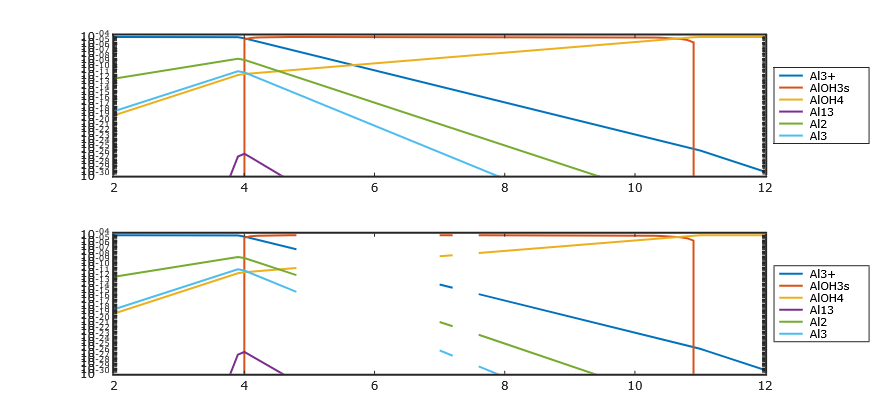

In [5]:
subplot(211)
semilogy(pH,Alp3,'linewidth',2,pH,AlLOH3Rs,'linewidth',2,pH,AlLOHR4m,'linewidth',2, ...
pH,Al13LOHR32p7,'linewidth',2,pH,Al2,'linewidth',2,pH,Al3,'linewidth',2)
 set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13','Al2','Al3','location','eastoutside')
axis([2 12 1e-30 2e-4])

subplot(212)
semilogy(pH,PAlp3,'linewidth',2,pH,PAlLOH3Rs,'linewidth',2,pH,PAlLOHR4m,'linewidth',2, ...
pH,PAl13LOHR32p7,'linewidth',2,pH,PAl2,'linewidth',2,pH,PAl3,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13','Al2','Al3','location','eastoutside')
axis([2 12 1e-30 2e-4])


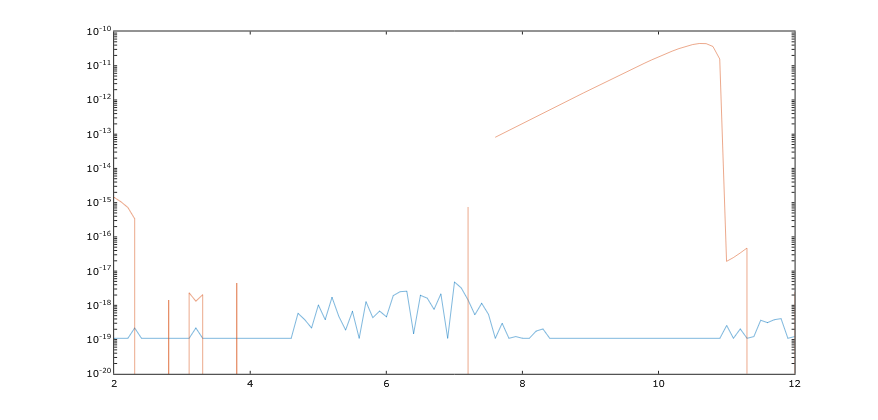

In [6]:
semilogy(pH,MASSERR,pH,PMASSERR)

In [7]:
PAl13LOHR32p7

PAl13LOHR32p7,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.18678e-39,1.67651e-36,2.30055e-33,3.04491e-30,3.85363e-27,1.25332e-26,2.50066e-27,4.98942e-28,9.95516e-29,1.98631e-29,3.96321e-30,7.90765e-31,1.57779e-31,3.14813e-32,nan,nan,nan,nan,nan,nan,3.96329e-37,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,0,0,0,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
%% Crear y guardar TODAS las variables de PHREEQC
who

disp("Contenido de PMASSERR:");
PMASSERR

% Crear estructura con todas las variables "P..." y pH
PHREEQC_Results = struct( ...
  "pH",             pH, ...
  "PMASSERR",       PMASSERR, ...
  "PAlp3",          PAlp3, ...
  "PAlLOH3Rs" ,     PAlLOH3Rs, ...
  "PAlLOHR4m",      PAlLOHR4m, ...
  "PAl13LOHR32p7",  PAl13LOHR32p7, ...
  "PAl2",           PAl2, ...
  "PAl3",           PAl3 ...
);

% Guardar la estructura en un archivo .mat
save("-mat", "Al_PHREEQC_data_all.mat", "PHREEQC_Results");

% Comprobar
clear
load("Al_PHREEQC_data_all.mat")
whos PHREEQC_Results


Variables visible from the current scope:

Al13LOHR32p7   ClT            PAlLOHR4m      flag0          n
Al2            JEQUILIBpath   PAlp3          flag1          pH
Al3            MASSERR        PHREEQCpath    flag2          pe
AlLOH3Rs       PAl13LOHR32p7  PMASSERR       flag3          rootpath
AlLOHR4m       PAl2           T              flag4          show
AlT            PAl3           TOTALS         flag5          txt
Alp3           PAlLOH3Rs      ans            i

Contenido de PMASSERR:


PMASSERR,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
1,1.40678e-15,1.04784e-15,7.18325e-16,3.36807e-16,-2.51155e-16,-3.88958e-18,-5.42101e-19,-4.87891e-19,1.38236e-18,-1.8838e-18,-3.75405e-18,2.30393e-18,1.3146e-18,2.03288e-18,-2.43945e-18,-5.20417e-18,-1.13299e-17,-5.32885e-17,4.32326e-18,-2.9409e-18,-1.20965e-10,-1.13768e-10,-7.19414e-11,-4.06747e-11,-2.20588e-11,-1.17867e-11,-5.89244e-12,-2.41267e-12,-9.93781e-13,nan,nan,nan,nan,nan,nan,-1.35568e-14,nan,nan,nan,nan,nan,nan,nan,nan,-3.27773e-15,nan,nan,nan,nan,nan,-5.36256e-15,-3.65306e-15,7.42245e-16,nan,2.77625e-14,nan,8.11216e-14,1.02571e-13,1.29184e-13,1.62604e-13,2.04666e-13,2.57549e-13,3.2422e-13,4.0799e-13,5.13334e-13,6.45772e-13,8.1222e-13,1.02133e-12,1.28387e-12,1.61327e-12,2.02619e-12,2.54321e-12,3.18968e-12,3.99647e-12,5.00101e-12,6.24795e-12,7.7897e-12,9.68619e-12,1.20033e-11,1.48087e-11,1.81635e-11,2.21064e-11,2.66258e-11,3.16109e-11,3.67701e-11,4.14955e-11,4.46397e-11,4.41531e-11,3.64956e-11,1.56903e-11,1.92717e-17,2.47605e-17,3.37322e-17,4.70408e-17,-1.70965e-16,-5.16351e-18,-4.60786e-18,-3.07697e-16,-3.65918e-19,-2.15485e-18,2.43945e-18


Variables visible from the current scope:

variables in scope: top scope

  Attr   Name                 Size                     Bytes  Class
  ====   ====                 ====                     =====  ===== 
         PHREEQC_Results      1x1                       6464  struct

Total is 1 element using 6464 bytes

